In [74]:
import qiskit # call the qiskit's module

def constant1():
    return
def constant2():
    program.x(qr[0])
    return
def balanced():
    program.cx(qr[0], qr[1])
    return
qr = qiskit.QuantumRegister(2) # call a quantum bit (or qubit)
cr = qiskit.ClassicalRegister(1) # call a clasical bit
program = qiskit.QuantumCircuit(qr, cr) # The quantum circuit is generated from the previous qubit and bit
program.h(qr[0])
program.x(qr[1])
program.h(qr[1])
program.barrier()
constant1()
program.barrier()
program.h(qr[0])
program.barrier()

In [75]:
program.measure(qr[0],cr) # The qubit is measured and stored in the classic bit.

In [76]:
program.draw()

┌───┐      ░  ░ ┌───┐ ░ ┌─┐
q77_0: ┤ H ├──────░──░─┤ H ├─░─┤M├
       ├───┤┌───┐ ░  ░ └───┘ ░ └╥┘
q77_1: ┤ X ├┤ H ├─░──░───────░──╫─
       └───┘└───┘ ░  ░       ░  ║ 
c13: 1/═════════════════════════╩═
                                0

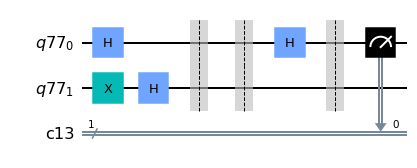

In [77]:
%matplotlib inline
program.draw(output="mpl")

In [78]:
job = qiskit.execute( program, qiskit.BasicAer.get_backend('qasm_simulator') )

In [79]:
print( job.result().get_counts() )

{'0': 1024}


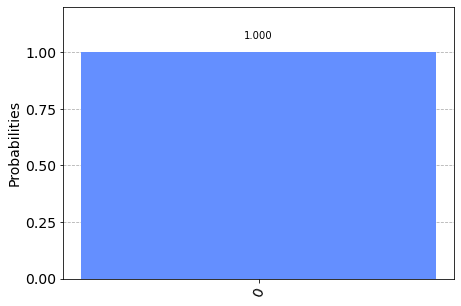

In [80]:
qiskit.visualization.plot_histogram(job.result().get_counts(program))

In [83]:
qiskit.IBMQ.save_account('your token',overwrite=True) #Replace the text my_token for your own token
qiskit.IBMQ.load_account() # load the token

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [84]:
provider = qiskit.IBMQ.get_provider("ibm-q") # select the provider
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().quibitss)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} : {backend.status().pending_jobs} & {qubit_count} qubits")

ibmq_qasm_simulator : 0 & simulated qubits
ibmq_lima : 22 & simulated qubits
ibmq_belem : 38 & simulated qubits
ibmq_quito : 14 & simulated qubits
simulator_statevector : 0 & simulated qubits
simulator_mps : 0 & simulated qubits
simulator_extended_stabilizer : 0 & simulated qubits
simulator_stabilizer : 0 & simulated qubits
ibmq_manila : 29 & simulated qubits
ibm_nairobi : 31 & simulated qubits
ibm_oslo : 79 & simulated qubits


In [85]:
backend = provider.get_backend('ibmq_lima') # select the name of the quatum computer to use
print("real device:",backend.name())
job = qiskit.execute(program, backend)

real device: ibmq_lima


In [86]:
print(job.result().get_counts()) # show the result

{'0': 3975, '1': 25}


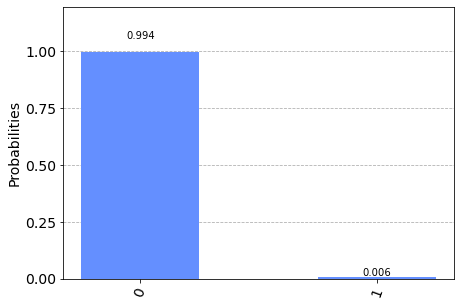

In [87]:
qiskit.visualization.plot_histogram(job.result().get_counts())

In [ ]:
#Reference
#https://leimao.github.io/blog/Deutsch-Algorithm/
#Lecture Notes "Weeks 7-8 2022.pdf"
#"program.barrier()" https://github.com/atilsamancioglu/QX07-DeutschAlgorithm
#"use X Gate to simulate constant functions" https://github.com/MakotoNakai/Deutch-Algorithm/blob/master/Deutch_constant.py
#"use IBMQ" https://fullstackquantumcomputation.tech/blog/post-tutorial-0-Hello-world/